In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
seaborn.set(font_scale=1.5)
from astropy.modeling import models, fitting
from __future__ import print_function

In [2]:
data = np.array([np.loadtxt('../data/post_stamp_profiles/candy_'+
                            str(i)+'_prof_i.dat', usecols=(0,1)) for i in range(2,6)])

## Surface brightness profiles
I made a very rough measurement of the SB profiles using DS9:

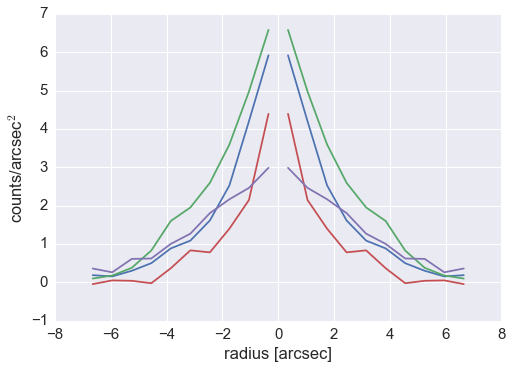

In [3]:
palette = seaborn.color_palette()
f1, a1 = plt.subplots()
for i in range(4):
    a1.plot(data[i,:,0], data[i,:,1], c=palette[i])
    a1.plot(-data[i,:,0], data[i,:,1], c=palette[i])
a1.set_xlabel('radius [arcsec]')
a1.set_ylabel(r'counts/arcsec$^2$');

## Approximate as Gaussians
Here, I fit Gaussians to the profiles:

In [4]:
fits = []
init_params = [(10., 0., 1.5), (6., 0., 1.5), (5., 0., 1.0), (2.8, 0.0, 4.0)]
for i in range(4):
    _a, _m, _s = init_params[i]
    g_init = models.Gaussian1D(amplitude=_a, mean=_m, stddev=_s)
    fit_g = fitting.LevMarLSQFitter()
    x = np.concatenate([-data[i,:,0], data[i,:,0]])
    y = np.concatenate([data[i,:,1], data[i,:,1]])
    fits.append(fit_g(g_init, x, y))

Lets see how good (bad) the fits are.. actually not _that_ bad:

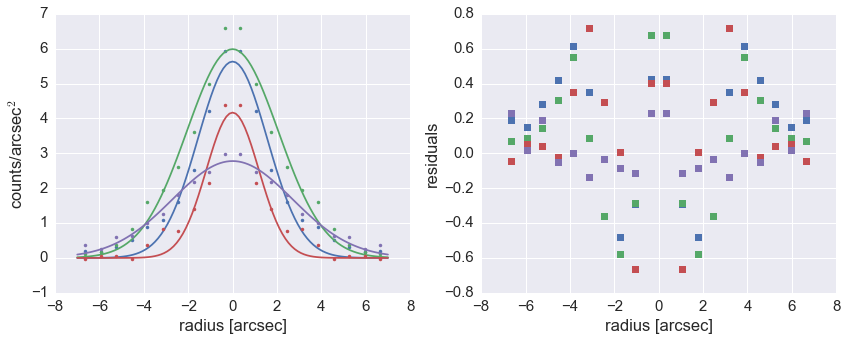

In [5]:
f2, a2 = plt.subplots(1,2,figsize=(14,5))
for i in range(4):
    x = np.concatenate([-data[i,:,0], data[i,:,0]])
    y = np.concatenate([data[i,:,1], data[i,:,1]])
    a2[0].plot(x, y, '.', c=palette[i])
    xfit = np.linspace(-7,7,101)
    a2[0].plot(xfit, fits[i](xfit), '-', c=palette[i])
    a2[1].plot(x, y - fits[i](x), 's', c=palette[i])
a2[0].set_xlabel('radius [arcsec]')
a2[0].set_ylabel(r'counts/arcsec$^2$')
a2[1].set_xlabel('radius [arcsec]')
a2[1].set_ylabel(r'residuals');

## Sizes
Here's the implied FWHM values:

In [6]:
for i in range(4):
    print('candidate', i+2, 'fwhm =', round(2.355*fits[i].stddev.value, 3), 'arcsec')

candidate 2 fwhm = 3.683 arcsec
candidate 3 fwhm = 4.856 arcsec
candidate 4 fwhm = 2.786 arcsec
candidate 5 fwhm = 6.361 arcsec


## Surface Brightness
Assuming we get half the light within a circle of radius 0.5*FHWM, here's the SB values:

In [7]:
imag = [21.10, 21.19, 22.35, 21.47] # total i-band magnitudes from Andy
for i in range(4):
    i_eff = imag[i] - 2.5*np.log10(0.5) # assume we get half the light
    r = 2.355*fits[i].stddev.value/2.0  # assume circle with r = 0.5*FWHM
    print('SB ~', i_eff + 2.5*np.log10(np.pi*r**2), 'mag/arcsec^2')

SB ~ 24.4213062036 mag/arcsec^2
SB ~ 25.1114902523 mag/arcsec^2
SB ~ 25.0651143218 mag/arcsec^2
SB ~ 25.9777916829 mag/arcsec^2


## A Summary of the GMOS-N B600 and R150 gratings: <br>


| Grating| $\lambda_c$ [nm]| Resolution $\lambda/\delta \lambda$ |Dispersion [nm/pixel]| Simultaneous coverage [nm]|
|:--------:|:------------------:|:------------------------:|:-------------------:|:--------------------------:|
| B600     |     461            |       1688               |     0.045           |        276                |
| R150     |     717            |       631                |     0.174           |        1071                 |


## The grating efficiency:

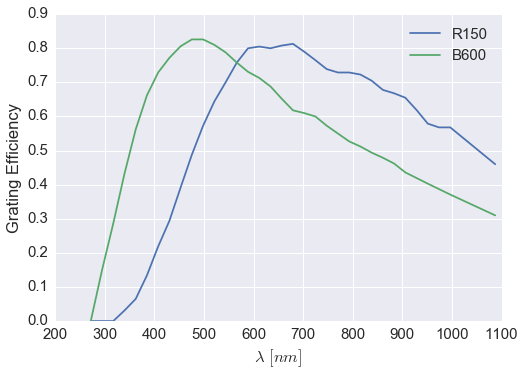

In [8]:
url = 'http://www.gemini.edu/sciops/instruments/gmos/gratings/gmos_n_B600_G5303.txt'
B600 = pd.read_csv(url, skiprows=13, delim_whitespace=True, names=['lambda', 'B600'])
url = 'http://www.gemini.edu/sciops/instruments/gmos/gratings/gmos_n_R150_G5306.txt'
R150 = pd.read_csv(url, skiprows=13, delim_whitespace=True, names=['lambda', 'R150'])
ax = B600.plot(x='lambda', y='B600', ax=R150.plot(x='lambda', y='R150'), xlim=[200,1100])
ax.set_xlabel('$\lambda\ [nm]$')
ax.set_ylabel('Grating Efficiency');